# Attribute information

 - **Age:** age of the patient [years]
 - **Sex:** sex of the patient [1: Male, 0: Female]
 - **Chest Pain Type:** chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
 - **BP:** resting blood pressure [mm Hg]
 - **Cholesterol:** serum cholesterol [mm/dl]
 - **FBS over 120:** fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
 - **EKG results:** displays resting electrocardiographic results 0 = normal;1   = having ST-T wave abnormality; 2 = left ventricular hyperthrophy
 - **MaxHR:** maximum heart rate achieved [Numeric value between 60 and 202]
 - **Exercise Angina:** exercise-induced angina [1: Yes, 0: No]
 - **ST depression:** induced by exercise relative to rest: displays the value which is an integer or float.
 - **Slope of ST:** the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
 - **Number of vessels fluro:** (0–3) colored by flourosopy  displays the value as integer or float.
 - **Thallium:** 3 = normal; 6=fixed defect; 7 = reversable defect
 - **HeartDisease:** output class [1: Presence, 0: Absence]

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, cross_val_predict

In [2]:
heart_df = pd.read_csv('Heart_Disease_Prediction.csv')
heart_df.head(10)

Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   
5   65    1                4  120          177             0            0   
6   56    1                3  130          256             1            2   
7   59    1                4  110          239             0            2   
8   60    1                4  140          293             0            2   
9   63    0                4  150          407             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   
5     140                0            0.4            1   
6     142                1            0.6            2   
7     142                1            1.2            2   
8     170                0            1.2            2   
9     154                0            4.0            2   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2                        0         7      Presence  
3                        1         7       Absence  
4                        1         3       Absence  
5                        0         7       Absence  
6                        1         6      Presence  
7                        1         7      Presence  
8                        2         7      Presence  
9                        3         7      Presence

In [3]:
heart_df.shape

(270, 14)

In [59]:
heart_df.describe()

Age         Sex  Chest pain type          BP  Cholesterol  \
count  270.000000  270.000000       270.000000  270.000000   270.000000   
mean    54.433333    0.677778         3.174074  131.344444   249.659259   
std      9.109067    0.468195         0.950090   17.861608    51.686237   
min     29.000000    0.000000         1.000000   94.000000   126.000000   
25%     48.000000    0.000000         3.000000  120.000000   213.000000   
50%     55.000000    1.000000         3.000000  130.000000   245.000000   
75%     61.000000    1.000000         4.000000  140.000000   280.000000   
max     77.000000    1.000000         4.000000  200.000000   564.000000   

       FBS over 120  EKG results      Max HR  Exercise angina  ST depression  \
count    270.000000   270.000000  270.000000       270.000000      270.00000   
mean       0.148148     1.022222  149.677778         0.329630        1.05000   
std        0.355906     0.997891   23.165717         0.470952        1.14521   
min        0.000000     0.000000   71.000000         0.000000        0.00000   
25%        0.000000     0.000000  133.000000         0.000000        0.00000   
50%        0.000000     2.000000  153.500000         0.000000        0.80000   
75%        0.000000     2.000000  166.000000         1.000000        1.60000   
max        1.000000     2.000000  202.000000         1.000000        6.20000   

       Slope of ST  Number of vessels fluro    Thallium  
count   270.000000               270.000000  270.000000  
mean      1.585185                 0.670370    4.696296  
std       0.614390                 0.943896    1.940659  
min       1.000000                 0.000000    3.000000  
25%       1.000000                 0.000000    3.000000  
50%       2.000000                 0.000000    3.000000  
75%       2.000000                 1.000000    7.000000  
max       3.000000                 3.000000    7.000000

In [60]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [61]:
heart_df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [62]:
## Checking for all the unique values against the attributes

for i, col in enumerate(heart_df.columns):
    print(heart_df.columns[i], '::\n', heart_df[str(col)].unique(), '\n\n')

Age ::
 [70 67 57 64 74 65 56 59 60 63 53 44 61 71 46 40 48 43 47 54 51 58 66 37
 50 42 62 49 52 45 41 76 39 35 55 34 38 69 68 77 29] 


Sex ::
 [1 0] 


Chest pain type ::
 [4 3 2 1] 


BP ::
 [130 115 124 128 120 110 140 150 135 142 134 112 132 138 160 170 144 122
 152 101 126 118 136 105 174 145 108 156 106 104  94 146 148 178 125 100
 165 180 158 200 117 192 123 129 102 155 172] 


Cholesterol ::
 [322 564 261 263 269 177 256 239 293 407 234 226 235 303 149 311 203 211
 199 229 245 204 288 275 243 295 230 265 228 215 326 200 207 273 180 222
 223 209 233 197 218 246 225 315 205 417 195 198 166 178 249 281 126 305
 240 276 319 242 260 354 309 208 236 270 214 201 244 306 221 330 266 206
 212 302 313 141 237 289 254 274 258 160 327 304 271 283 188 286 360 267
 196 232 277 210 213 282 167 224 268 250 219 217 308 193 231 262 259 325
 299 182 294 298 409 172 184 394 174 255 248 300 318 216 252 227 220 168
 183 341 186 307 164 257 321 264 253 185 290 175 353 335 247 340 284 192] 


FBS ove

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

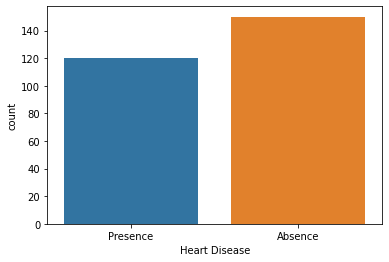

In [63]:
## Checking for the class imbalance of the Target Variable

sb.countplot(heart_df['Heart Disease'])
heart_df['Heart Disease'].value_counts()

In [64]:
## Label encode the Str attributes

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

heart_df['Heart Disease'] = le.fit_transform(heart_df['Heart Disease'])

heart_df.head(10)

Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   
5   65    1                4  120          177             0            0   
6   56    1                3  130          256             1            2   
7   59    1                4  110          239             0            2   
8   60    1                4  140          293             0            2   
9   63    0                4  150          407             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   
5     140                0            0.4            1   
6     142                1            0.6            2   
7     142                1            1.2            2   
8     170                0            1.2            2   
9     154                0            4.0            2   

   Number of vessels fluro  Thallium  Heart Disease  
0                        3         3              1  
1                        0         7              0  
2                        0         7              1  
3                        1         7              0  
4                        1         3              0  
5                        0         7              0  
6                        1         6              1  
7                        1         7              1  
8                        2         7              1  
9                        3         7              1

# Data visualization

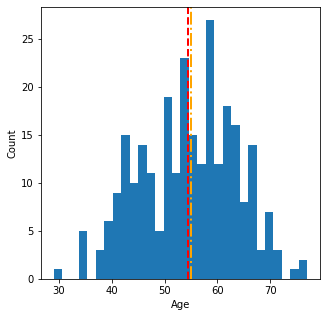

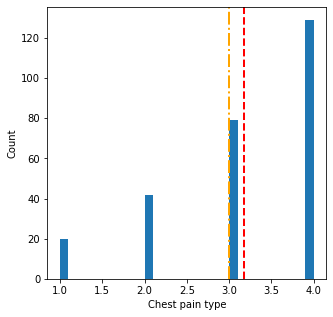

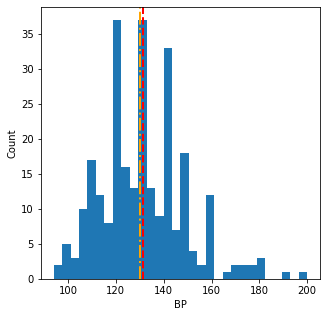

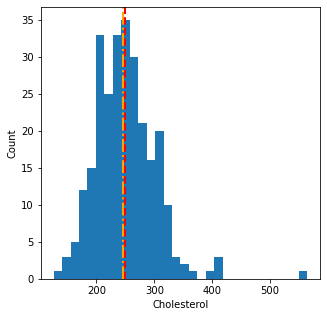

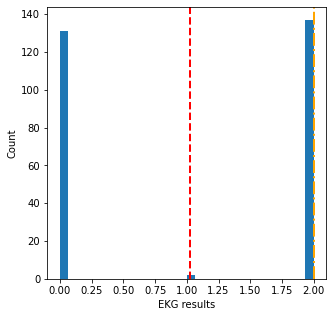

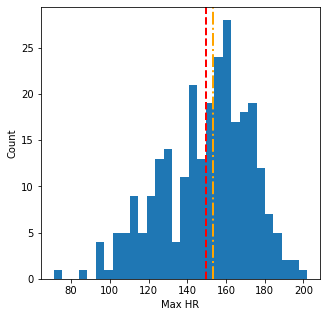

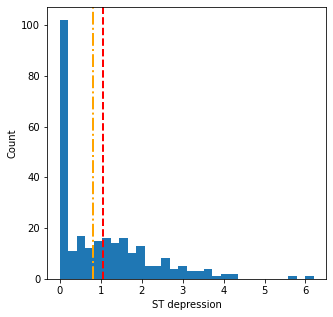

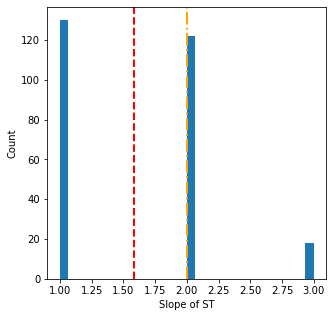

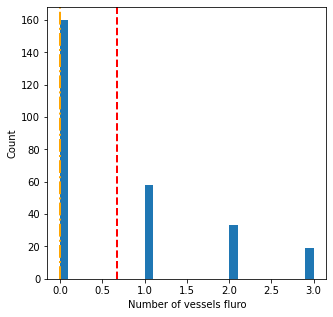

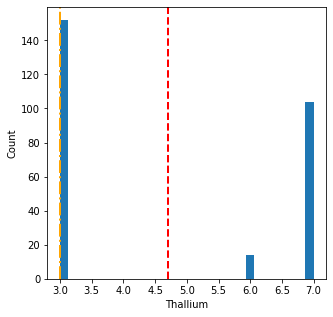

In [65]:
## Checking for the distributions of the quantitative attributes

for col in heart_df.select_dtypes(exclude = 'object').columns.drop(['Sex', 'FBS over 120','Exercise angina','Heart Disease']):  ## Removing sex, FBS over 120,Exercise angina, Heart Disease attributes as they are ordinal variables with values of 1 & 0
    plt.figure(figsize = [5, 5])
    plt.hist(heart_df[str(col)], bins = 30)
    plt.axvline(x = heart_df[str(col)].mean(), color = 'red', ls = '--', lw = 2)
    plt.axvline(x = heart_df[str(col)].median(), color = 'orange', ls = '-.', lw = 2)
    plt.xlabel(str(col))
    plt.ylabel('Count')
    plt.show()

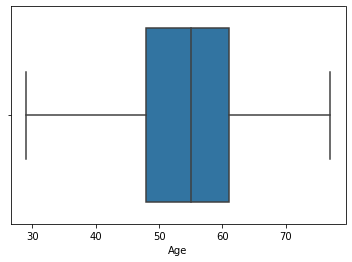

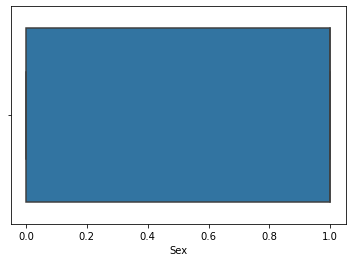

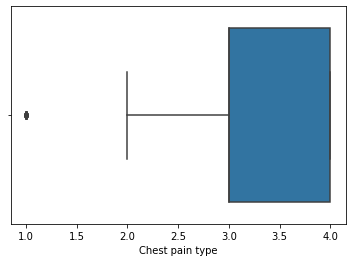

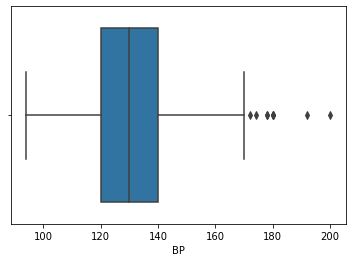

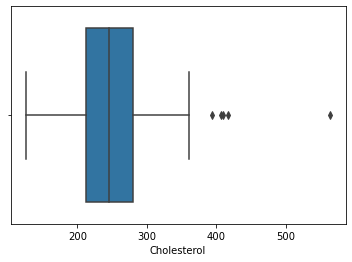

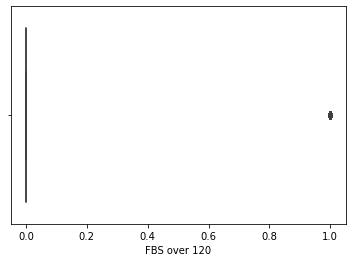

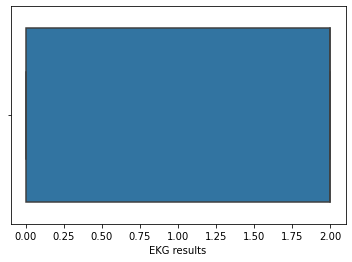

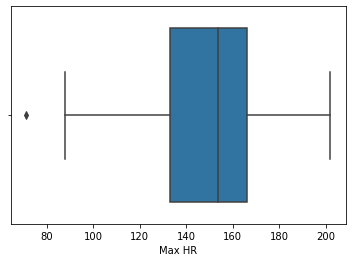

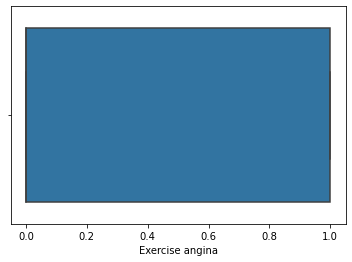

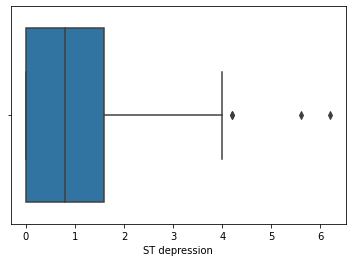

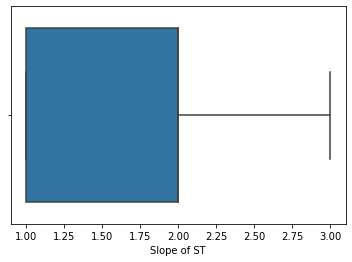

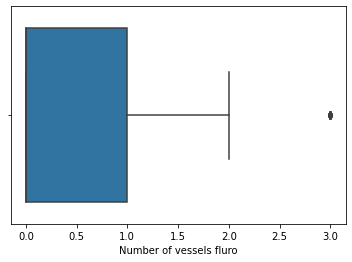

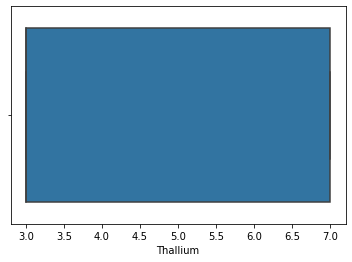

In [66]:
## Checking for outliers

for col in heart_df.columns[:-1]:
    sb.boxplot(heart_df[col]);
    
    plt.show()



---



---


Looking at the above plots, it is clear that the attributes

`Chest pain type`, `BP`, `Cholestrol`,`ST depression`,`Number of vessels fluro` and `Max HR` contain outliers, so we would do best to cap them (we are not removing them since we are taking into account all the attributes may be a good contributor to the target). 

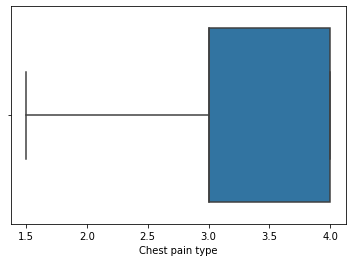

In [67]:
## Capping `Chest pain type`

lower = heart_df['Chest pain type'].quantile(0.25) - 1.5 * (heart_df['Chest pain type'].quantile(0.75) - 
                                                      heart_df['Chest pain type'].quantile(0.25))
upper = heart_df['Chest pain type'].quantile(0.25) + 1.5 * (heart_df['Chest pain type'].quantile(0.75) - 
                                                      heart_df['Chest pain type'].quantile(0.25))

heart_df['Chest pain type'] = np.where(heart_df['Chest pain type'] > upper, upper, 
                                 np.where(heart_df['Chest pain type'] < lower, lower, heart_df['Chest pain type']))

sb.boxplot(heart_df['Chest pain type']);
plt.show()

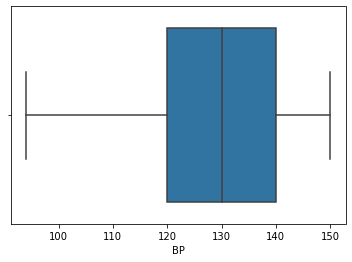

In [68]:
## Capping `BP`

lower = heart_df['BP'].quantile(0.25) - 1.5 * (heart_df['BP'].quantile(0.75) - 
                                                      heart_df['BP'].quantile(0.25))
upper = heart_df['BP'].quantile(0.25) + 1.5 * (heart_df['BP'].quantile(0.75) - 
                                                      heart_df['BP'].quantile(0.25))

heart_df['BP'] = np.where(heart_df['BP'] > upper, upper, 
                                 np.where(heart_df['BP'] < lower, lower, heart_df['BP']))

sb.boxplot(heart_df['BP']);
plt.show()

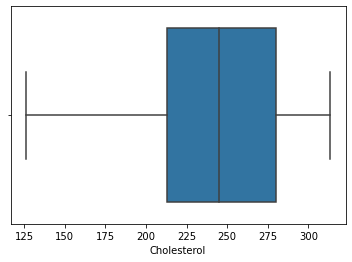

In [69]:
## Capping `Cholestrol`

lower = heart_df['Cholesterol'].quantile(0.25) - 1.5 * (heart_df['Cholesterol'].quantile(0.75) - 
                                                      heart_df['Cholesterol'].quantile(0.25))
upper = heart_df['Cholesterol'].quantile(0.25) + 1.5 * (heart_df['Cholesterol'].quantile(0.75) - 
                                                      heart_df['Cholesterol'].quantile(0.25))

heart_df['Cholesterol'] = np.where(heart_df['Cholesterol'] > upper, upper, 
                                 np.where(heart_df['Cholesterol'] < lower, lower, heart_df['Cholesterol']))

sb.boxplot(heart_df['Cholesterol']);
plt.show()

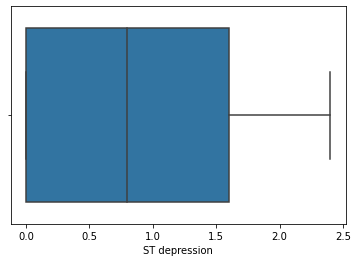

In [70]:
## Capping `ST depression`

lower = heart_df['ST depression'].quantile(0.25) - 1.5 * (heart_df['ST depression'].quantile(0.75) - 
                                                      heart_df['ST depression'].quantile(0.25))
upper = heart_df['ST depression'].quantile(0.25) + 1.5 * (heart_df['ST depression'].quantile(0.75) - 
                                                      heart_df['ST depression'].quantile(0.25))

heart_df['ST depression'] = np.where(heart_df['ST depression'] > upper, upper, 
                                 np.where(heart_df['ST depression'] < lower, lower, heart_df['ST depression']))

sb.boxplot(heart_df['ST depression']);
plt.show()

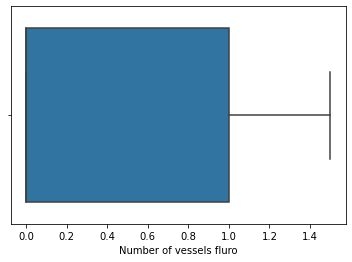

In [71]:
## Capping `Number of vessels fluro`

lower = heart_df['Number of vessels fluro'].quantile(0.25) - 1.5 * (heart_df['Number of vessels fluro'].quantile(0.75) - 
                                                      heart_df['Number of vessels fluro'].quantile(0.25))
upper = heart_df['Number of vessels fluro'].quantile(0.25) + 1.5 * (heart_df['Number of vessels fluro'].quantile(0.75) - 
                                                      heart_df['Number of vessels fluro'].quantile(0.25))

heart_df['Number of vessels fluro'] = np.where(heart_df['Number of vessels fluro'] > upper, upper, 
                                 np.where(heart_df['Number of vessels fluro'] < lower, lower, heart_df['Number of vessels fluro']))

sb.boxplot(heart_df['Number of vessels fluro']);
plt.show()

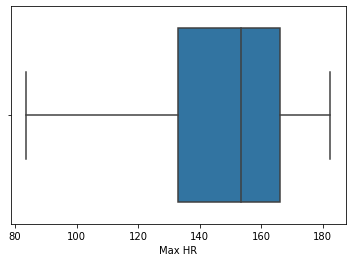

In [72]:
## Capping `Max HR`

lower = heart_df['Max HR'].quantile(0.25) - 1.5 * (heart_df['Max HR'].quantile(0.75) - 
                                                      heart_df['Max HR'].quantile(0.25))
upper = heart_df['Max HR'].quantile(0.25) + 1.5 * (heart_df['Max HR'].quantile(0.75) - 
                                                      heart_df['Max HR'].quantile(0.25))

heart_df['Max HR'] = np.where(heart_df['Max HR'] > upper, upper, 
                                 np.where(heart_df['Max HR'] < lower, lower, heart_df['Max HR']))

sb.boxplot(heart_df['Max HR']);
plt.show()

[]

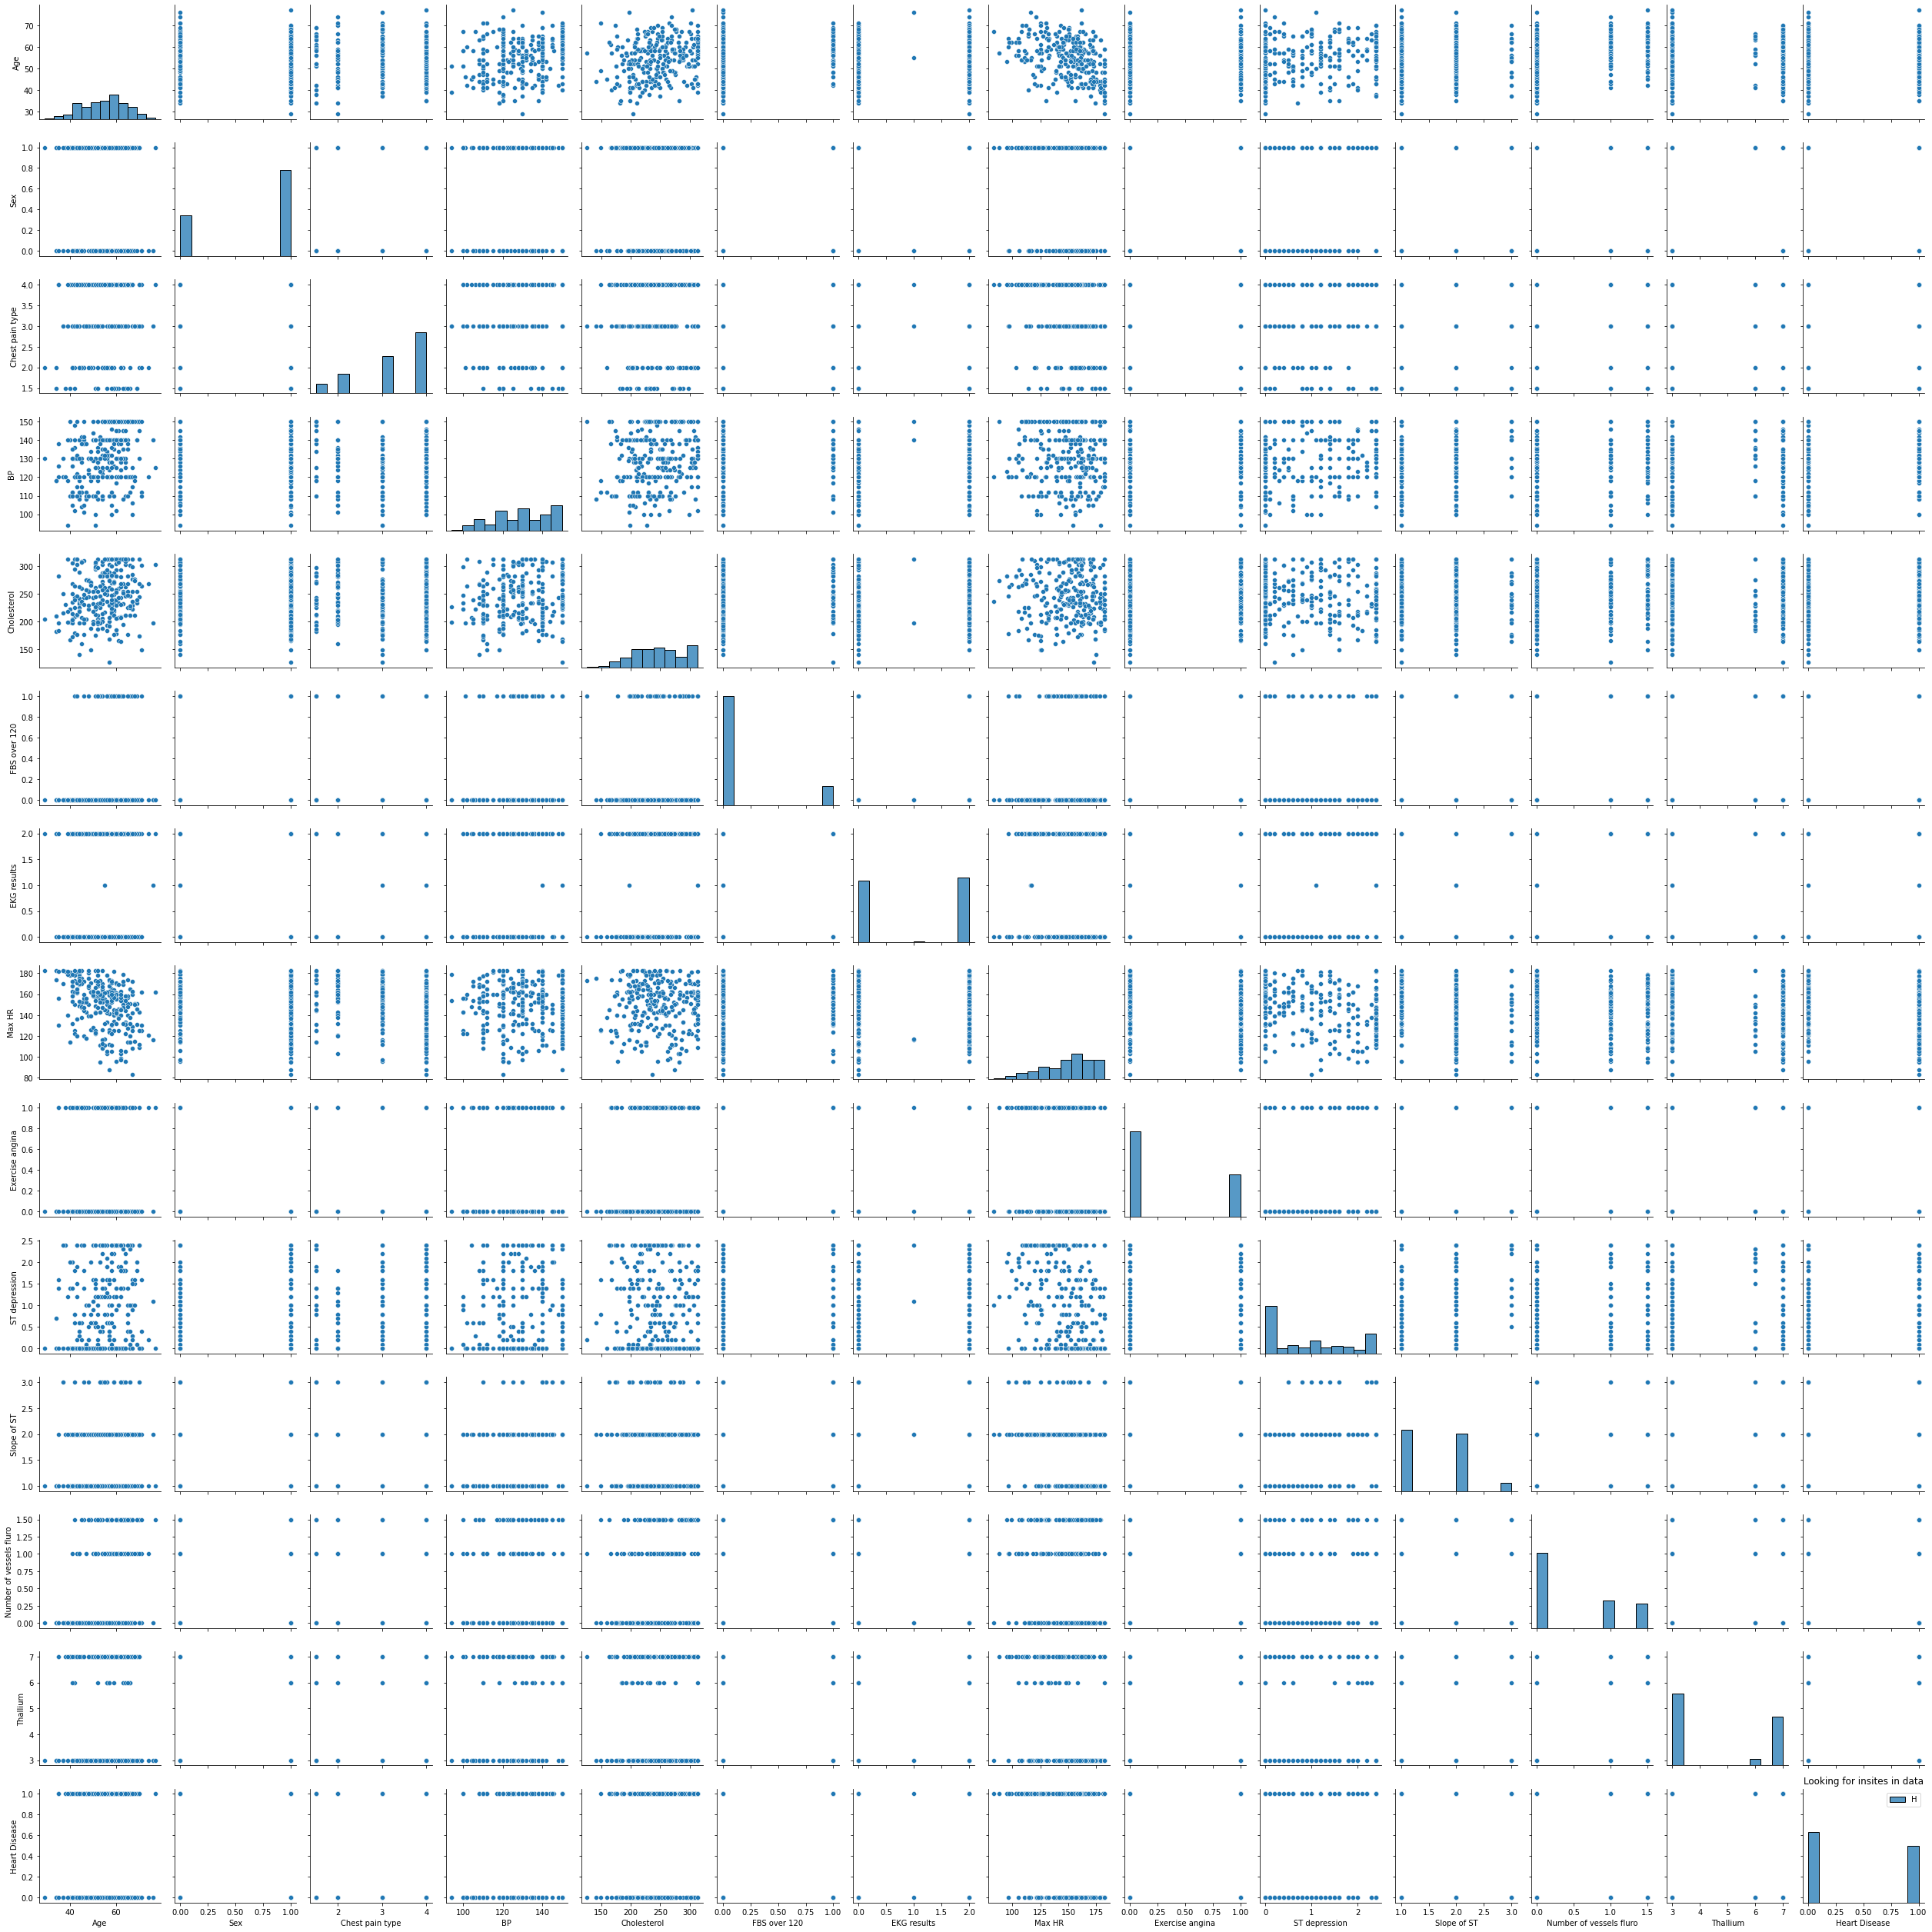

In [73]:
sb.pairplot(heart_df)
plt.title("Looking for insites in data")
plt.legend("HertDisease")
plt.tight_layout()
plt.plot()

In [74]:
heart_df.head(10)

Age  Sex  Chest pain type     BP  Cholesterol  FBS over 120  EKG results  \
0   70    1              4.0  130.0        313.5             0            2   
1   67    0              3.0  115.0        313.5             0            2   
2   57    1              2.0  124.0        261.0             0            0   
3   64    1              4.0  128.0        263.0             0            0   
4   74    0              2.0  120.0        269.0             0            2   
5   65    1              4.0  120.0        177.0             0            0   
6   56    1              3.0  130.0        256.0             1            2   
7   59    1              4.0  110.0        239.0             0            2   
8   60    1              4.0  140.0        293.0             0            2   
9   63    0              4.0  150.0        313.5             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0   109.0                0            2.4            2   
1   160.0                0            1.6            2   
2   141.0                0            0.3            1   
3   105.0                1            0.2            2   
4   121.0                1            0.2            1   
5   140.0                0            0.4            1   
6   142.0                1            0.6            2   
7   142.0                1            1.2            2   
8   170.0                0            1.2            2   
9   154.0                0            2.4            2   

   Number of vessels fluro  Thallium  Heart Disease  
0                      1.5         3              1  
1                      0.0         7              0  
2                      0.0         7              1  
3                      1.0         7              0  
4                      1.0         3              0  
5                      0.0         7              0  
6                      1.0         6              1  
7                      1.0         7              1  
8                      1.5         7              1  
9                      1.5         7              1

# Splitting data

In [75]:
## Splitting the data into Train & Test

from sklearn.model_selection import train_test_split

x_train, x_test, Y_train, Y_test = train_test_split(heart_df.iloc[:, :-1].values, heart_df.iloc[:, -1].values, 
                                                    test_size = 0.3, random_state = 123)

x_train.shape, x_test.shape, Y_train.shape, Y_test.shape

((189, 13), (81, 13), (189,), (81,))

# Normalization

In [76]:
# Normalizing the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

sc_x_train = scaler.fit_transform(x_train)
sc_x_test = scaler.transform(x_test)

sc_x_train, x_train, sc_x_test

(array([[-1.05019666, -1.39754249, -1.38751395, ...,  0.59160798,
         -0.78492777, -0.8788816 ],
        [-0.26875111,  0.71554175, -1.96134357, ...,  0.59160798,
         -0.78492777,  0.67353543],
        [-0.38038619,  0.71554175, -0.23985471, ...,  0.59160798,
         -0.78492777, -0.8788816 ],
        ...,
        [-0.15711604,  0.71554175,  0.90780453, ...,  2.18894952,
         -0.78492777,  1.19100778],
        [ 0.73596459, -1.39754249,  0.90780453, ...,  0.59160798,
         -0.78492777,  1.19100778],
        [ 1.07086982, -1.39754249, -0.23985471, ..., -1.00573356,
         -0.78492777,  1.19100778]]),
 array([[45. ,  0. ,  2. , ...,  2. ,  0. ,  3. ],
        [52. ,  1. ,  1.5, ...,  2. ,  0. ,  6. ],
        [51. ,  1. ,  3. , ...,  2. ,  0. ,  3. ],
        ...,
        [53. ,  1. ,  4. , ...,  3. ,  0. ,  7. ],
        [61. ,  0. ,  4. , ...,  2. ,  0. ,  7. ],
        [64. ,  0. ,  3. , ...,  1. ,  0. ,  7. ]]),
 array([[ 0.28942428,  0.71554175, -0.23985471, ...,

# Discretization

In [77]:
from sklearn.preprocessing import KBinsDiscretizer
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
heartdf = kbins.fit_transform(heart_df)

In [78]:
heartdf = pd.DataFrame(heartdf,columns = ['Age','Sex','Chest pain type','BP','Cholesterol','FBS over 120','EKG results','Max HR','Exercise angina','ST depression','Slope of ST','Number of vessels fluro','Thallium','Heart Disease'])
heartdf.describe().round(2)

Age     Sex  Chest pain type      BP  Cholesterol  FBS over 120  \
count  270.00  270.00           270.00  270.00       270.00        270.00   
mean     4.82    6.10             6.37    5.80         5.86          1.33   
std      1.89    4.21             3.06    2.49         2.21          3.20   
min      0.00    0.00             0.00    0.00         0.00          0.00   
25%      3.00    0.00             6.00    4.00         4.00          0.00   
50%      5.00    9.00             6.00    6.00         6.00          0.00   
75%      6.00    9.00             9.00    8.00         8.00          0.00   
max      9.00    9.00             9.00    9.00         9.00          9.00   

       EKG results  Max HR  Exercise angina  ST depression  Slope of ST  \
count       270.00  270.00           270.00         270.00       270.00   
mean          4.60    6.11             2.97           3.50         2.86   
std           4.49    2.23             4.24           3.45         2.92   
min           0.00    0.00             0.00           0.00         0.00   
25%           0.00    5.00             0.00           0.00         0.00   
50%           9.00    7.00             0.00           3.00         5.00   
75%           9.00    8.00             9.00           6.00         5.00   
max           9.00    9.00             9.00           9.00         9.00   

       Number of vessels fluro  Thallium  Heart Disease  
count                   270.00    270.00         270.00  
mean                      3.02      3.83           4.00  
std                       3.78      4.38           4.48  
min                       0.00      0.00           0.00  
25%                       0.00      0.00           0.00  
50%                       0.00      0.00           0.00  
75%                       6.00      9.00           9.00  
max                       9.00      9.00           9.00

In [79]:
heart_df.to_csv('preprocessedheart(3).csv')

# Building the models

In [80]:
parameters = {'penalty':['l2'], 'C':[0.1,1.0, 10.0, 100.0, 1000.0]}

In [81]:
accuracy_train = []
accuracy_test = []
recall_model = []

# Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
lr_model = LogisticRegression()

In [83]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [84]:
clf = GridSearchCV(lr_model, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf = clf.fit(sc_x_train,Y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


In [85]:
best_clf.best_estimator_

LogisticRegression(C=0.23357214690901212, penalty='l1', solver='saga')

In [86]:
from sklearn.metrics import recall_score, f1_score, classification_report

lr_model = LogisticRegression(solver = 'saga', penalty = 'l1', C = 0.23357214690901212, random_state = 123)

Y_pred = lr_model.fit(sc_x_train, Y_train).predict(sc_x_test)
lr_acc_score = accuracy_score(Y_test, Y_pred)
print('The Recall score for the LogisticRegression model: ', recall_score(Y_test, Y_pred))
print('The corresponding F1-score: ', f1_score(Y_test, Y_pred))
print('\n\n')
print('The corresponding Classification Report: \n', classification_report(Y_test, Y_pred))
accuracy_train.append(lr_model.score(sc_x_train,Y_train))
accuracy_test.append(lr_model.score(sc_x_test,Y_test))
recall_model.append(recall_score(Y_test, Y_pred))

The Recall score for the LogisticRegression model:  0.8055555555555556
The corresponding F1-score:  0.7945205479452055



The corresponding Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.82      0.83        45
           1       0.78      0.81      0.79        36

    accuracy                           0.81        81
   macro avg       0.81      0.81      0.81        81
weighted avg       0.82      0.81      0.82        81



# Decision tree

In [87]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

In [88]:
parameters = {'max_depth' : (3,5,7,9,10,15,20,25)
              , 'criterion' : ('gini', 'entropy')
              , 'max_features' : ('auto', 'sqrt', 'log2')
              , 'min_samples_split' : (2,4,6)
              , 'min_samples_leaf' : (3,5,7,9,10,15,20)
              , 'min_samples_split' : (2,3,4)
             }
DT_grid  = GridSearchCV(DecisionTreeClassifier(), param_grid = parameters, cv = 5, verbose = 2,n_jobs=-1)
DT_grid.fit(sc_x_train,Y_train)

Fitting 5 folds for each of 1008 candidates, totalling 5040 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': (3, 5, 7, 9, 10, 15, 20, 25),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'min_samples_leaf': (3, 5, 7, 9, 10, 15, 20),
                         'min_samples_split': (2, 3, 4)},
             verbose=2)

In [89]:
DT_grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='auto',
                       min_samples_leaf=10)

In [90]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 9, min_samples_leaf = 5, 
                                  min_samples_split = 3, random_state = 123)

Y_pred = dt_model.fit(sc_x_train, Y_train).predict(sc_x_test)
dt_acc_score = accuracy_score(Y_test, Y_pred)
print('The Recall score for the DecisionTree model: ', recall_score(Y_test, Y_pred))
print('The corresponding F1-score: ', f1_score(Y_test, Y_pred))
print('\n\n')
print('The corresponding Classification Report: \n', classification_report(Y_test, Y_pred))
accuracy_train.append(dt_model.score(sc_x_train,Y_train))
accuracy_test.append(dt_model.score(sc_x_test,Y_test))
recall_model.append(recall_score(Y_test, Y_pred))

The Recall score for the DecisionTree model:  0.75
The corresponding F1-score:  0.7012987012987012



The corresponding Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.69      0.73        45
           1       0.66      0.75      0.70        36

    accuracy                           0.72        81
   macro avg       0.72      0.72      0.72        81
weighted avg       0.72      0.72      0.72        81



# Random forest

In [91]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

In [92]:
n_estimators=[830,833,840]
min_samples_split=[30,35]
min_samples_leaf=[30,35,40]
max_features=["auto"]
max_depth=[150,160,170]
criterion=["entropy"]
space_grid={"n_estimators":n_estimators,
           "min_samples_split":min_samples_split,
           "min_samples_leaf":min_samples_leaf,
           "max_features":max_features,
           "max_depth":max_depth,
           "criterion":criterion}

In [93]:
grid=GridSearchCV(estimator=rf_model,param_grid=space_grid,cv=5,verbose=2,n_jobs=-1)
grid.fit(sc_x_train,Y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [150, 160, 170],
                         'max_features': ['auto'],
                         'min_samples_leaf': [30, 35, 40],
                         'min_samples_split': [30, 35],
                         'n_estimators': [830, 833, 840]},
             verbose=2)

In [94]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 150,
 'max_features': 'auto',
 'min_samples_leaf': 30,
 'min_samples_split': 30,
 'n_estimators': 830}

In [95]:
rf_model = RandomForestClassifier(criterion = 'entropy', max_depth = 150, min_samples_leaf = 30, 
                                  min_samples_split = 30, n_estimators = 883, n_jobs = 1, random_state = 123)

Y_pred = rf_model.fit(sc_x_train, Y_train).predict(sc_x_test)
rf_acc_score = accuracy_score(Y_test, Y_pred)
print('The Recall score for the RandomForest model: ', recall_score(Y_test, Y_pred))
print('The corresponding F1-score: ', f1_score(Y_test, Y_pred))
print('\n\n')
print('The corresponding Classification Report: \n', classification_report(Y_test, Y_pred))
accuracy_train.append(rf_model.score(sc_x_train,Y_train))
accuracy_test.append(rf_model.score(sc_x_test,Y_test))
recall_model.append(recall_score(Y_test, Y_pred))

The Recall score for the RandomForest model:  0.6388888888888888
The corresponding F1-score:  0.7301587301587301



The corresponding Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.91      0.83        45
           1       0.85      0.64      0.73        36

    accuracy                           0.79        81
   macro avg       0.81      0.77      0.78        81
weighted avg       0.80      0.79      0.78        81



# Support vctor

In [96]:
from sklearn.svm import SVC
svc_model = SVC()

In [97]:
param_grid = {'C': [1,10,100], 
              'gamma': [0.1,0.01,0.001, 'scale', 'auto'],
              'kernel': ['linear', 'poly', 'sigmoid']}
grid = GridSearchCV(svc_model,param_grid)
grid.fit(sc_x_train,Y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100],
                         'gamma': [0.1, 0.01, 0.001, 'scale', 'auto'],
                         'kernel': ['linear', 'poly', 'sigmoid']})

In [98]:
grid.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}

In [99]:
svc_model = SVC(C = 1, gamma = 0.1, random_state = 123)

Y_pred = svc_model.fit(sc_x_train, Y_train).predict(sc_x_test)
svc_acc_score = accuracy_score(Y_test, Y_pred)
print('The Recall score for the SVM model: ', recall_score(Y_test, Y_pred))
print('The corresponding F1-score: ', f1_score(Y_test, Y_pred))
print('\n\n')
print('The corresponding Classification Report: \n', classification_report(Y_test, Y_pred))
accuracy_train.append(svc_model.score(sc_x_train,Y_train))
accuracy_test.append(svc_model.score(sc_x_test,Y_test))
recall_model.append(recall_score(Y_test, Y_pred))

The Recall score for the SVM model:  0.8055555555555556
The corresponding F1-score:  0.7837837837837838



The corresponding Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.80      0.82        45
           1       0.76      0.81      0.78        36

    accuracy                           0.80        81
   macro avg       0.80      0.80      0.80        81
weighted avg       0.80      0.80      0.80        81



# Model Evaluation

In [100]:
Models = ['Logistic Regression','Decision Tree','Random Forest','Support Vector Machine']
total_v2 = list(zip(Models,accuracy_train,accuracy_test,recall_model))
output_v2 = pd.DataFrame(total_v2, columns = ['Models','Accuracy_train','Accuracy_test','Recall'])

s_v2 = output_v2.groupby(['Models'])['Accuracy_train','Accuracy_test','Recall'].mean().reset_index().sort_values(by='Accuracy_test',ascending=False)
s_v2.head(10).style.background_gradient(cmap='Reds')

# Comparisons

In [101]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Random Forest','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,rf_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
print(lr_acc_score*100)
print(rf_acc_score*100)
print(dt_acc_score*100)
print(svc_acc_score*100)

81.48148148148148
79.01234567901234
71.60493827160494
80.24691358024691


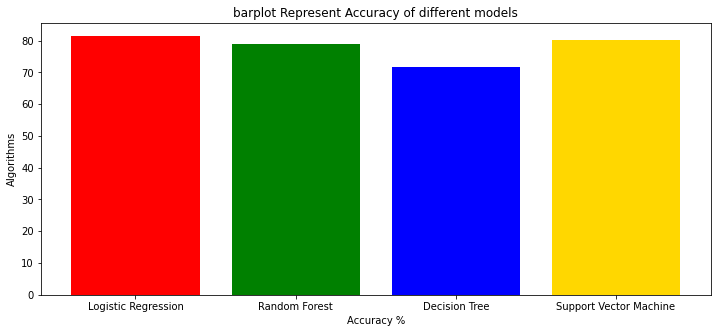

In [102]:
colors = ['red','green','blue','gold','orange']
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

# Conclusion

**Given the above `Recall` scores  and comparions between all the models(As it is a Healthcare problem, Recall is considered to be the best metric solver in the Healthcare predictions, as we need to keep the margin of error really really small), as well as the corresponding F1 scores, we consider using `Logistic Regression` here....
Exerciseangina,Chest pain is major symptoms of heart attack.**